In [1]:
from db.database import Database

In [2]:
db = Database()

In [3]:
blueprints = db.get_all_blueprints()

Loading blueprints: 100%|██████████| 2232/2232 [00:03<00:00, 664.62it/s]


## Plots

### 5 and 5 keywords bar

C:\Users\Adrian\AppData\Local\Temp\ipykernel_18792\764467236.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,4))


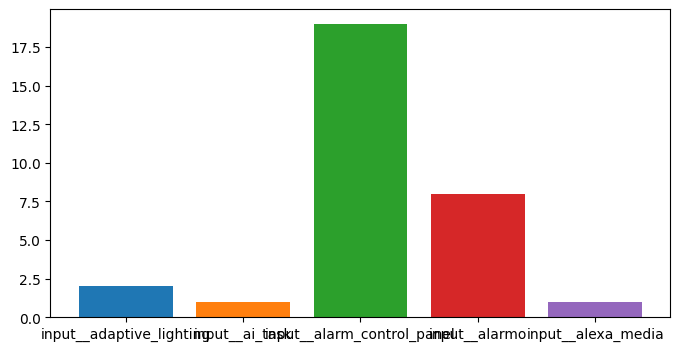

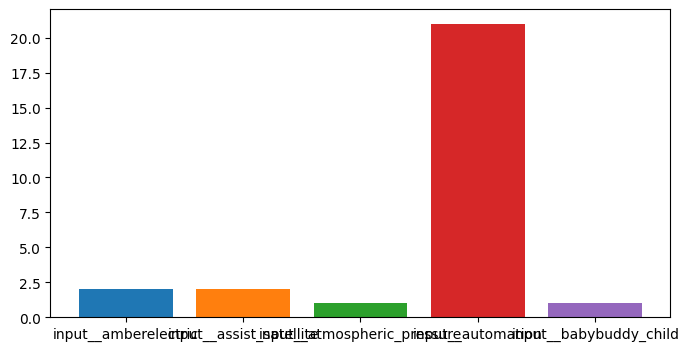

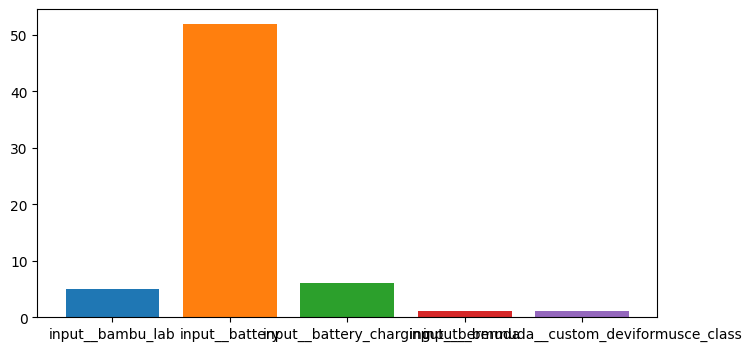

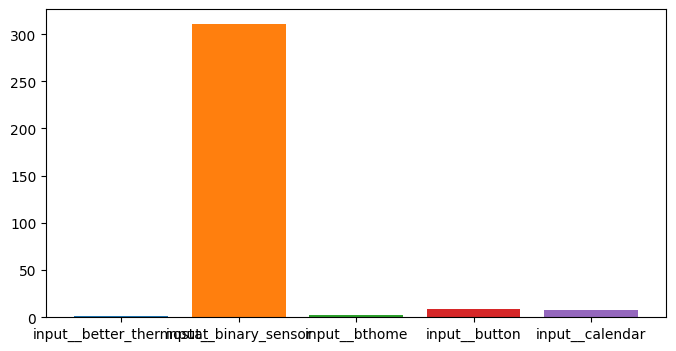

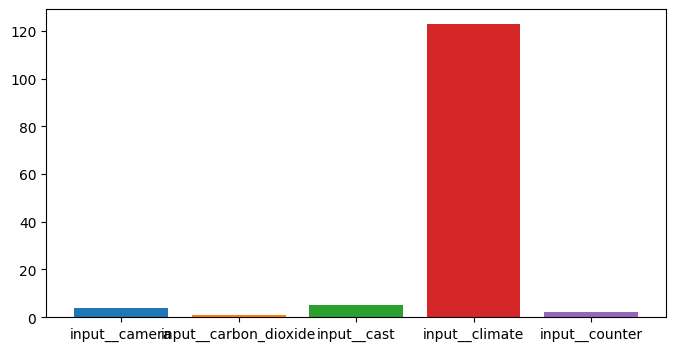

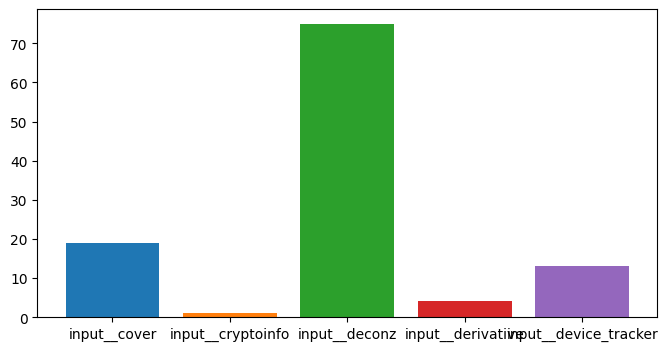

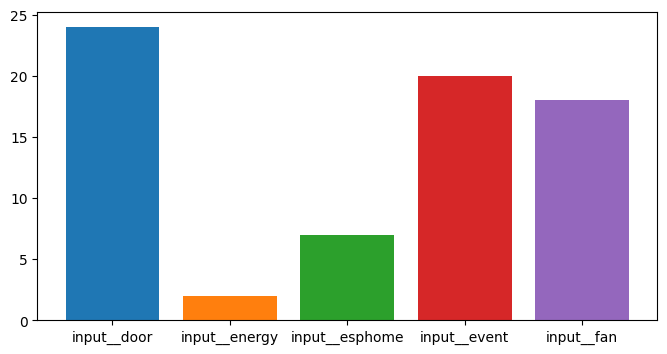

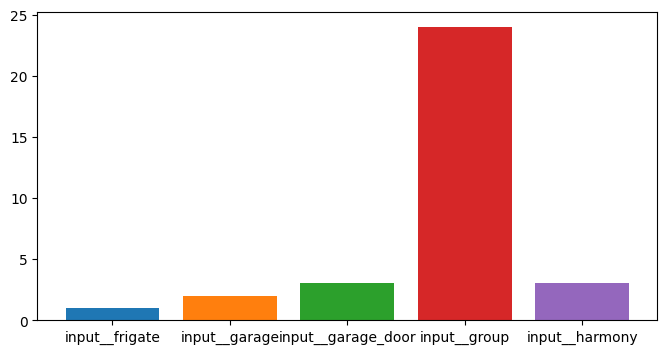

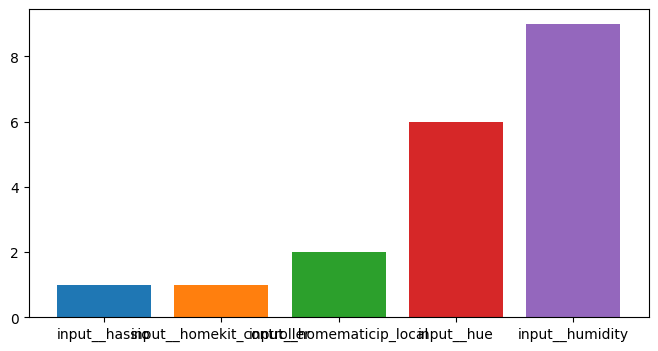

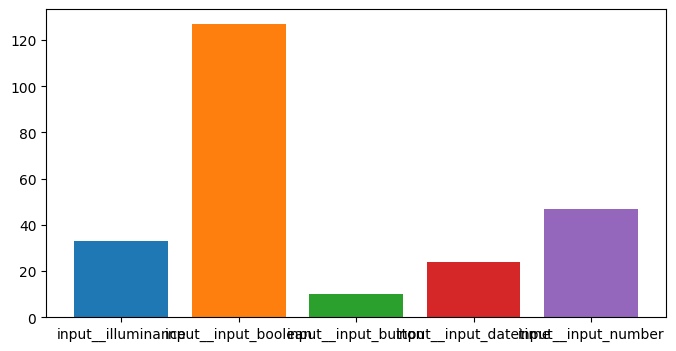

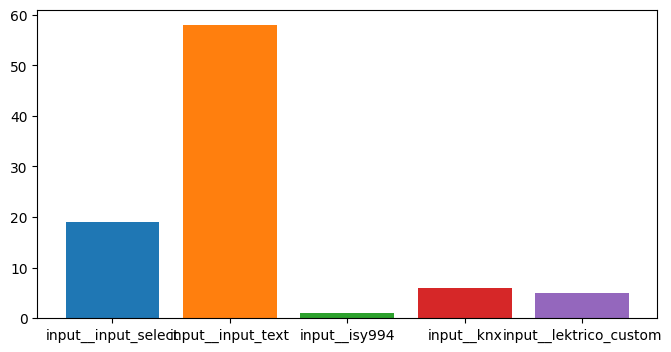

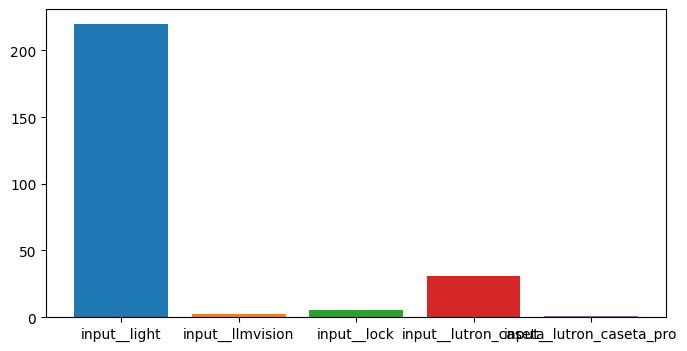

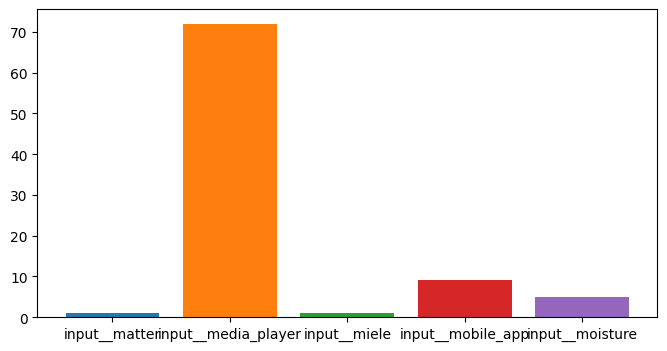

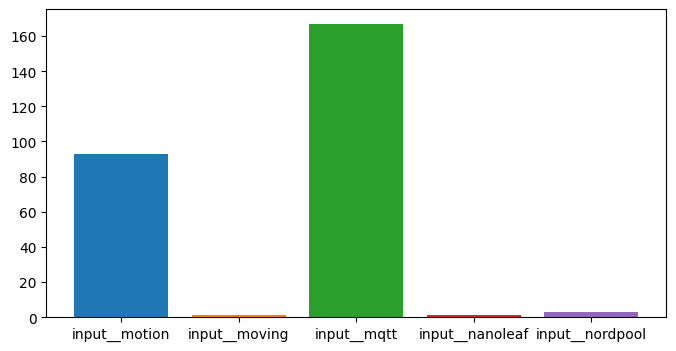

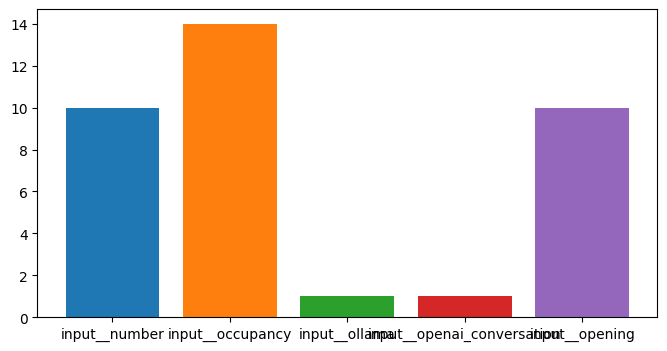

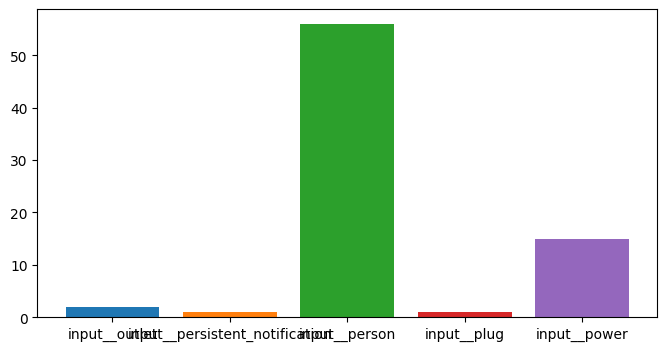

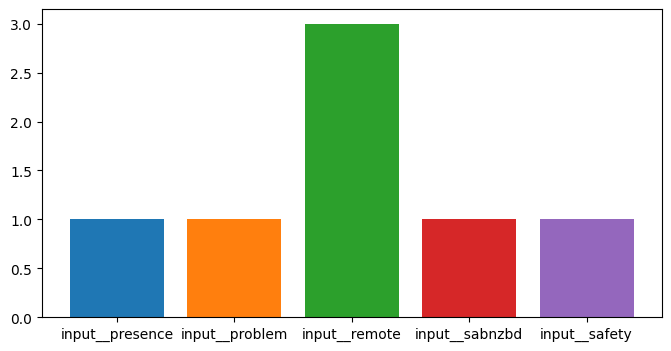

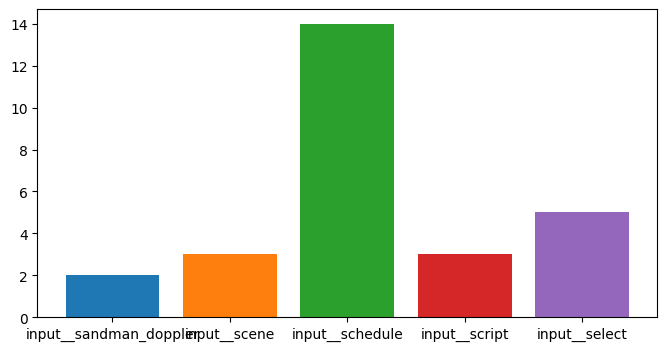

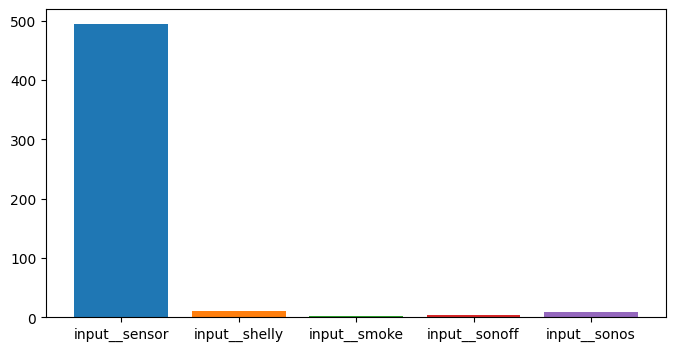

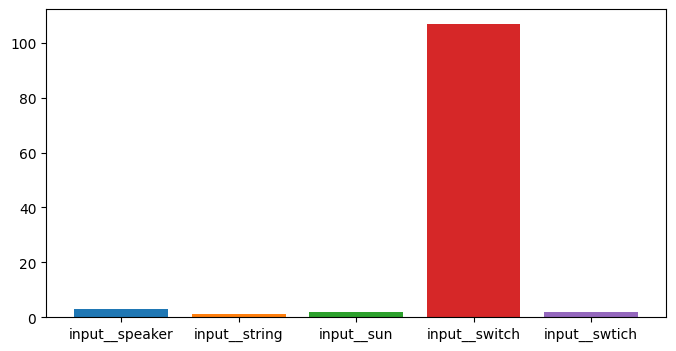

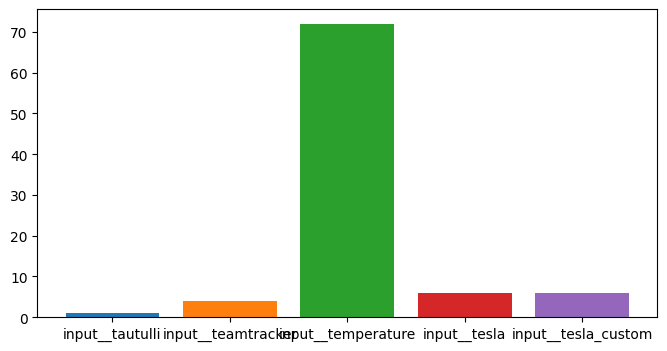

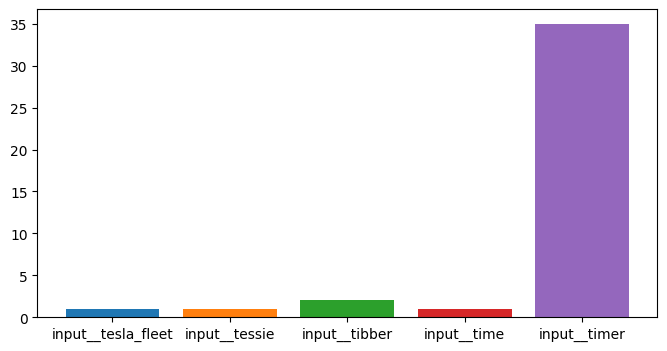

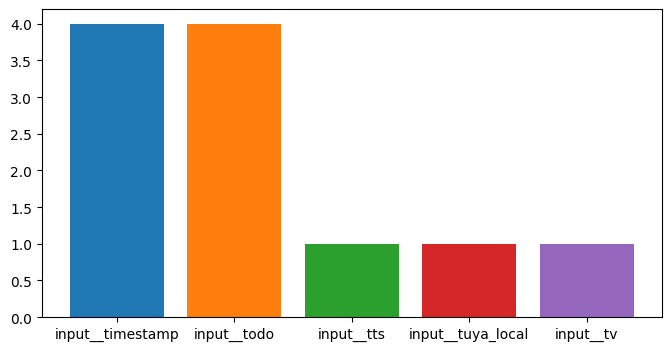

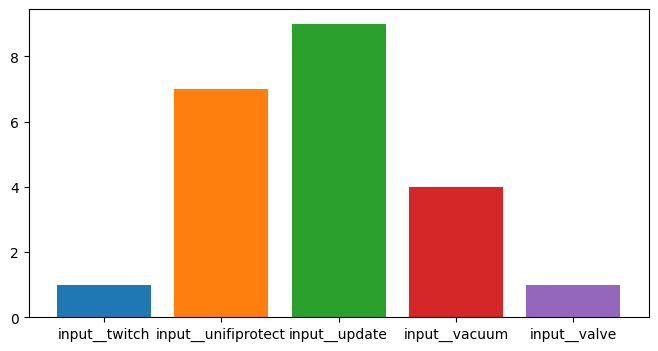

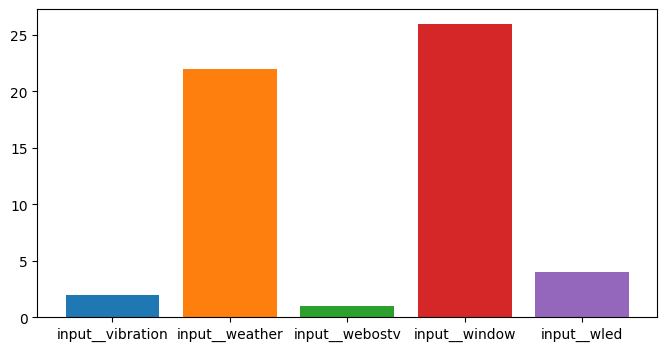

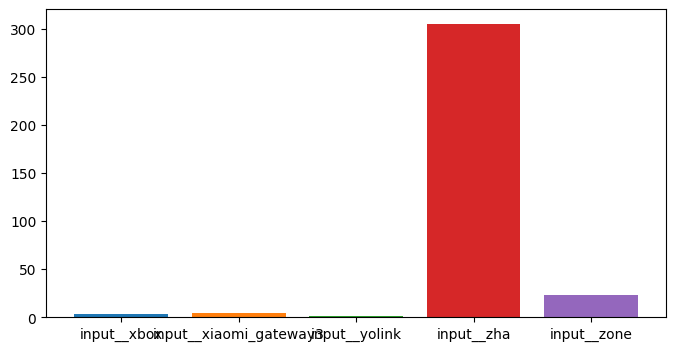

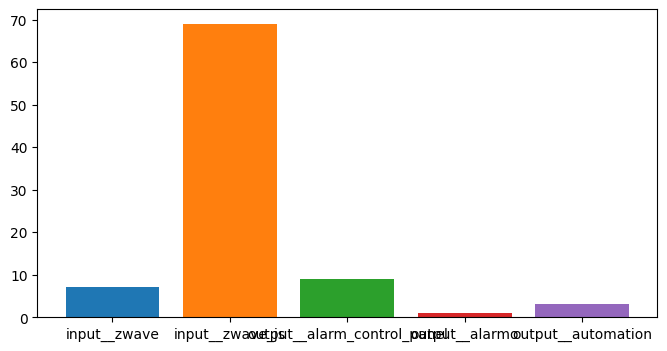

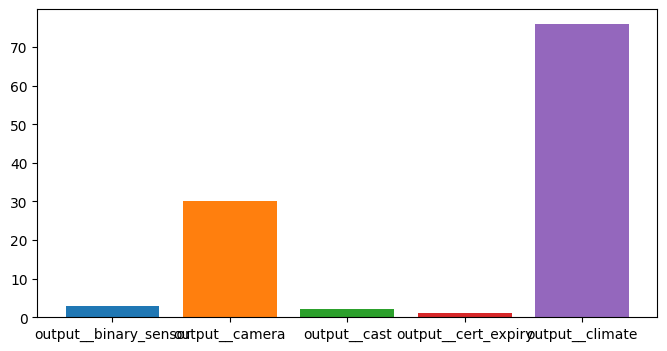

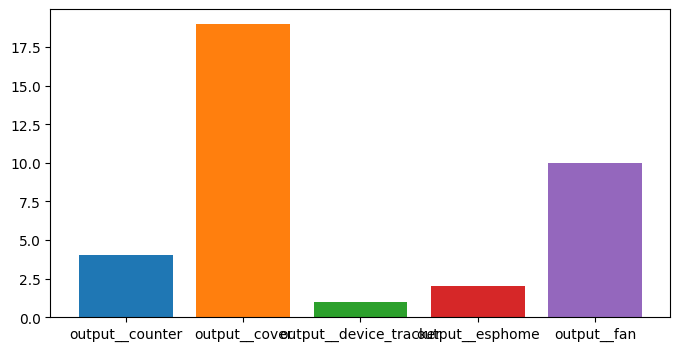

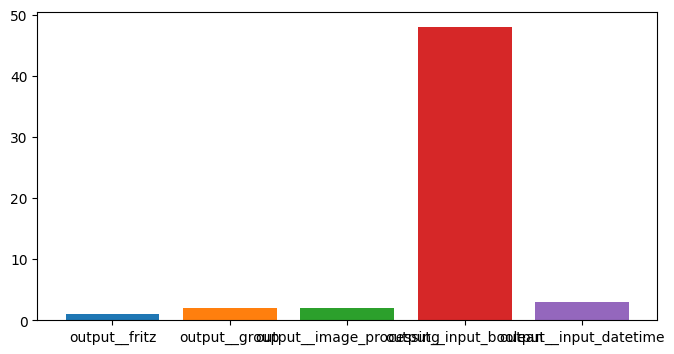

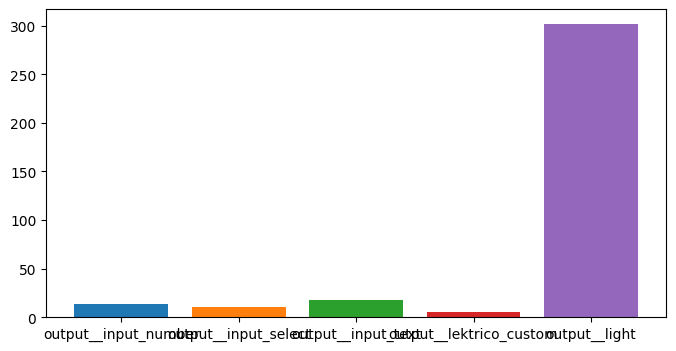

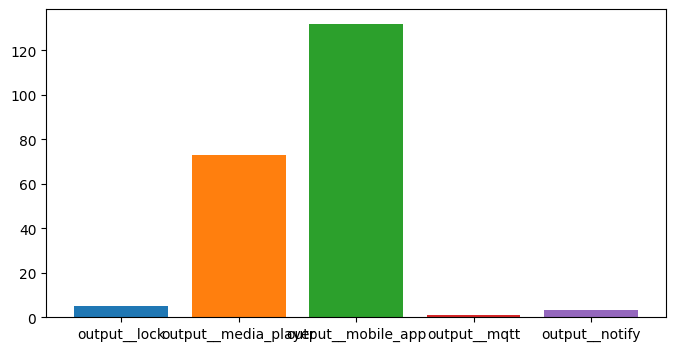

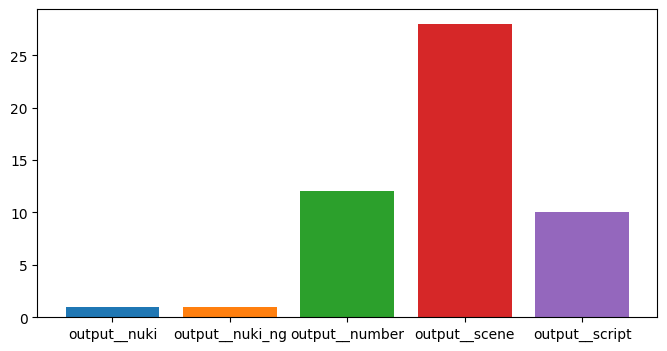

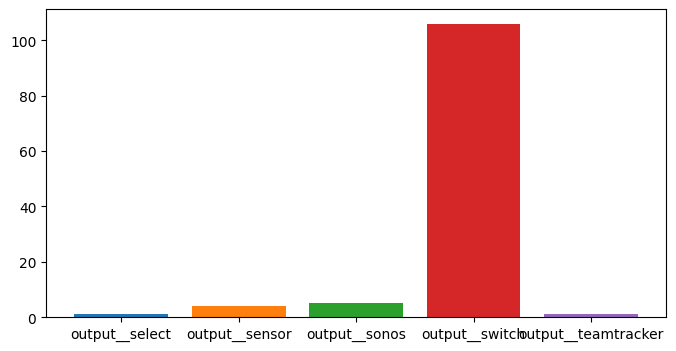

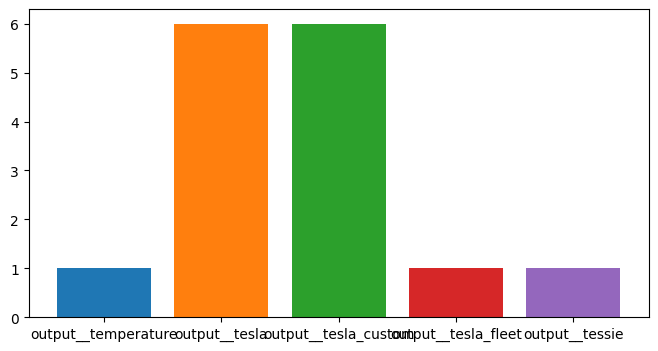

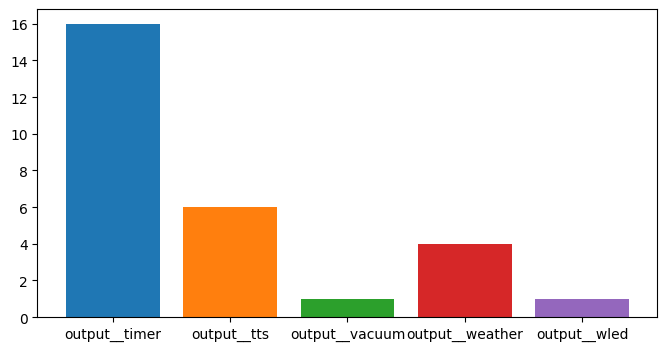

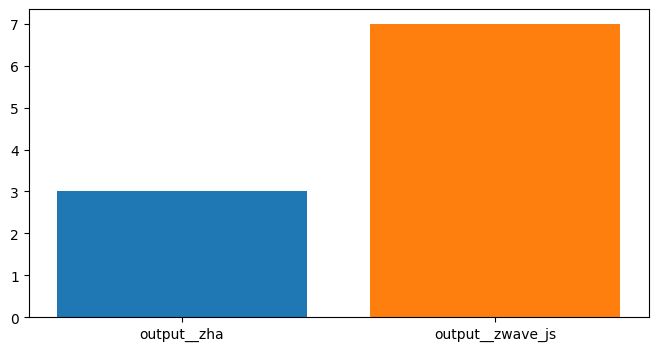

In [21]:
import matplotlib.pyplot as plt
import numpy as np
keywords = [bp.extracted_keywords for bp in blueprints]
# plot keyword occurrence frequencies
all_keywords = [keyword for sublist in keywords for keyword in sublist]
unique, counts = np.unique(all_keywords, return_counts=True)
for i, (u, c) in enumerate(zip(unique, counts)):
    if i % 5 == 0 or i == 0:
        plt.figure(figsize=(8,4))
    plt.bar(u, c)
plt.show()

### Keyword WordCloud

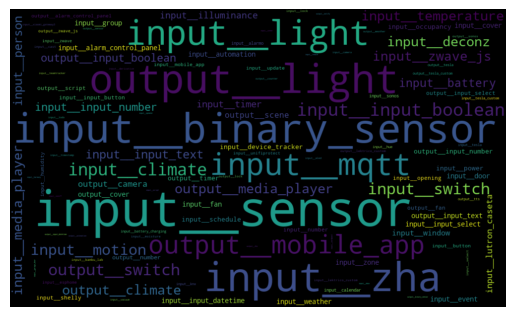

In [10]:
from wordcloud import WordCloud
keyword_frequencies = dict(zip(unique, counts))
wordcloud = WordCloud(width=1000, height=600).generate_from_frequencies(keyword_frequencies)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 10 most common keywords pie-chart

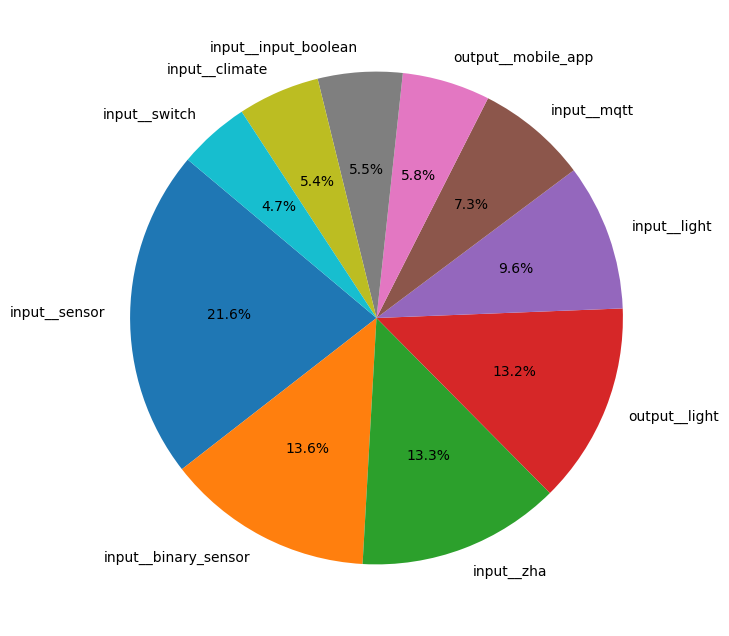

In [19]:
sorted_indices = np.argsort(counts)[::-1]
sorted_unique = unique[sorted_indices]
sorted_counts = counts[sorted_indices]
N = 10
plt.figure(figsize=(8,8))
plt.pie(sorted_counts[:N], labels=sorted_unique[:N], autopct='%1.1f%%', startangle=140)
plt.show()

### Bars tags

In [ ]:
topics = db.get_topics()
topic_tags = [str(topic.tags) for topic in topics]

[['[', ']'],
 ['[', ']'],
 ['[', '"', 'b', 'l', 'u', 'e', 'p', 'r', 'i', 'n', 't', '"', ']'],
 ['[', '"', 'b', 'l', 'u', 'e', 'p', 'r', 'i', 'n', 't', '"', ']'],
 ['[',
  '"',
  's',
  'w',
  'i',
  't',
  'c',
  'h',
  '"',
  ',',
  ' ',
  '"',
  'b',
  'l',
  'u',
  'e',
  'p',
  'r',
  'i',
  'n',
  't',
  '"',
  ',',
  ' ',
  '"',
  'd',
  'e',
  'c',
  'o',
  'n',
  'z',
  '"',
  ']'],
 ['[', ']'],
 ['[', ']'],
 ['[',
  '"',
  'a',
  'u',
  't',
  'o',
  'm',
  'a',
  't',
  'i',
  'o',
  'n',
  '"',
  ',',
  ' ',
  '"',
  'b',
  'l',
  'u',
  'e',
  'p',
  'r',
  'i',
  'n',
  't',
  '"',
  ']'],
 ['[', ']'],
 ['[',
  '"',
  'a',
  'u',
  't',
  'o',
  'm',
  'a',
  't',
  'i',
  'o',
  'n',
  '"',
  ',',
  ' ',
  '"',
  'b',
  'l',
  'u',
  'e',
  'p',
  'r',
  'i',
  'n',
  't',
  '"',
  ']'],
 ['[', ']'],
 ['[',
  '"',
  'a',
  'u',
  't',
  'o',
  'm',
  'a',
  't',
  'i',
  'o',
  'n',
  '"',
  ',',
  ' ',
  '"',
  'b',
  'l',
  'u',
  'e',
  'p',
  'r',
  'i',
  'n',
  't',

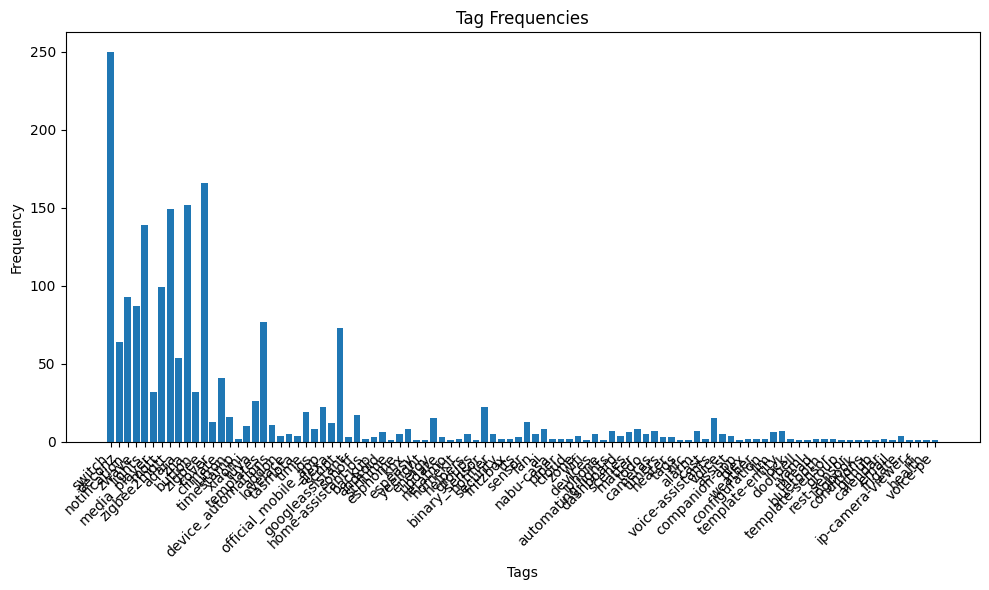

In [48]:
from collections import Counter
import json
parsed_tags = [json.loads(tags) for tags in topic_tags]
all_tags = [tag for sublist in parsed_tags for tag in sublist]
filtered_tags = [tag for tag in all_tags if tag not in ['blueprint', 'automation']]
tag_counts = Counter(filtered_tags)
unique = list(tag_counts.keys())
counts = list(tag_counts.values())
plt.figure(figsize=(10, 6))
plt.bar(unique, counts)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title("Tag Frequencies")
plt.xlabel("Tags")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Tags wordcloud

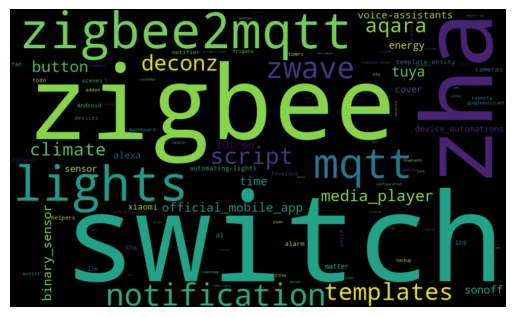

In [49]:
wordcloud = WordCloud(width=1000, height=600).generate_from_frequencies(tag_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Tags pie-chart

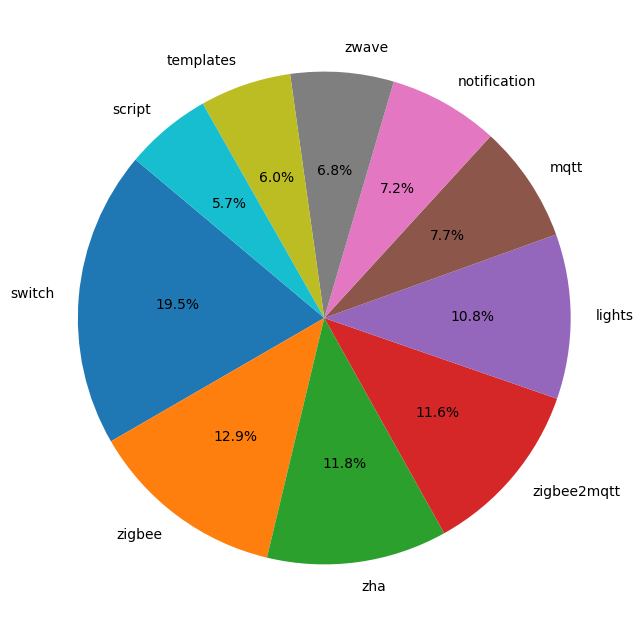

In [51]:
sorted_indices = np.argsort(counts)[::-1]
unique = np.array(unique)[sorted_indices]
counts = np.array(counts)[sorted_indices]
plt.figure(figsize=(8,8))
plt.pie(counts[:N], labels=unique[:N], autopct='%1.1f%%', startangle=140)
plt.show()